In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN # WE HAVE HERE THREE TYPE OF MODEL TO USE
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df = df.drop(columns=["ID", "Year_Birth"], axis=1)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [3]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}' has {len(unique_values)} unique values")

Column 'Education' has 5 unique values
Column 'Marital_Status' has 8 unique values
Column 'Income' has 1975 unique values
Column 'Kidhome' has 3 unique values
Column 'Teenhome' has 3 unique values
Column 'Dt_Customer' has 663 unique values
Column 'Recency' has 100 unique values
Column 'MntWines' has 776 unique values
Column 'MntFruits' has 158 unique values
Column 'MntMeatProducts' has 558 unique values
Column 'MntFishProducts' has 182 unique values
Column 'MntSweetProducts' has 177 unique values
Column 'MntGoldProds' has 213 unique values
Column 'NumDealsPurchases' has 15 unique values
Column 'NumWebPurchases' has 15 unique values
Column 'NumCatalogPurchases' has 14 unique values
Column 'NumStorePurchases' has 14 unique values
Column 'NumWebVisitsMonth' has 16 unique values
Column 'AcceptedCmp3' has 2 unique values
Column 'AcceptedCmp4' has 2 unique values
Column 'AcceptedCmp5' has 2 unique values
Column 'AcceptedCmp1' has 2 unique values
Column 'AcceptedCmp2' has 2 unique values
Colu

In [6]:
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100


value = {
    "missing_value": missing_values,
    "percent_missing": percent_missing,
    "data type": df.dtypes
}
missing_table = pd.DataFrame(value)
missing_table.sort_values(by="percent_missing", ascending=False)

,missing_value,percent_missing,data type
Income,24,1.071429,float64
Education,0,0.000000,object
NumWebPurchases,0,0.000000,int64
Z_Revenue,0,0.000000,int64
Z_CostContact,0,0.000000,int64
Complain,0,0.000000,int64
AcceptedCmp2,0,0.000000,int64
AcceptedCmp1,0,0.000000,int64
AcceptedCmp5,0,0.000000,int64
AcceptedCmp4,0,0.000000,int64


In [7]:
categorical, numerical = [],[]
for i in df.columns:
    if df[i].dtype == "object":
        categorical.append(i)
    else:
        numerical.append(i)
        
print(categorical)
print(numerical)

['Education', 'Marital_Status', 'Dt_Customer']
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [8]:


lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])
    

In [9]:
mice_imputer = IterativeImputer(max_iter=1000)
df.iloc[:,:] = mice_imputer.fit_transform(df)

In [10]:
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Education,0,0.0,int64
Marital_Status,0,0.0,int64
Income,0,0.0,float64
Kidhome,0,0.0,int64
Teenhome,0,0.0,int64
Dt_Customer,0,0.0,int64
Recency,0,0.0,int64
MntWines,0,0.0,int64
MntFruits,0,0.0,int64
MntMeatProducts,0,0.0,int64


In [11]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,2,4,58138.0,0,0,80,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,2,4,46344.0,1,1,157,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,2,5,71613.0,0,0,444,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,2,5,26646.0,1,0,199,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,4,3,58293.0,1,0,390,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,272,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,4,5,64014.0,2,1,207,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,2,2,56981.0,0,0,521,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,3,5,69245.0,0,1,500,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [12]:

features = df.drop(["Response"], axis=1)

# Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-0.350141,0.251004,0.235268,-0.825218,-0.929894,-1.303763,0.307039,0.983781,1.551577,1.679702,...,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
1,-0.350141,0.251004,-0.234626,1.032559,0.906934,-0.898762,-0.383664,-0.870479,-0.636301,-0.713225,...,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2,-0.350141,1.180340,0.772135,-0.825218,-0.929894,0.610786,-0.798086,0.362723,0.570804,-0.177032,...,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
3,-0.350141,1.180340,-1.019429,1.032559,-0.929894,-0.677853,-0.798086,-0.870479,-0.560857,-0.651187,...,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
4,1.428354,-0.678332,0.241443,1.032559,-0.929894,0.326760,1.550305,-0.389085,0.419916,-0.216914,...,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.350141,-0.678332,0.358179,-0.825218,0.906934,-0.293891,-0.107383,1.203678,0.419916,0.066692,...,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2236,1.428354,1.180340,0.469378,2.890335,0.906934,-0.635775,0.237969,0.303291,-0.661449,-0.606873,...,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0
2237,-0.350141,-1.607669,0.189171,-0.825218,-0.929894,1.015787,1.446700,1.795020,0.545656,0.221789,...,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2238,0.539106,1.180340,0.677790,-0.825218,0.906934,0.905332,-1.419719,0.368666,0.092992,0.208495,...,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0


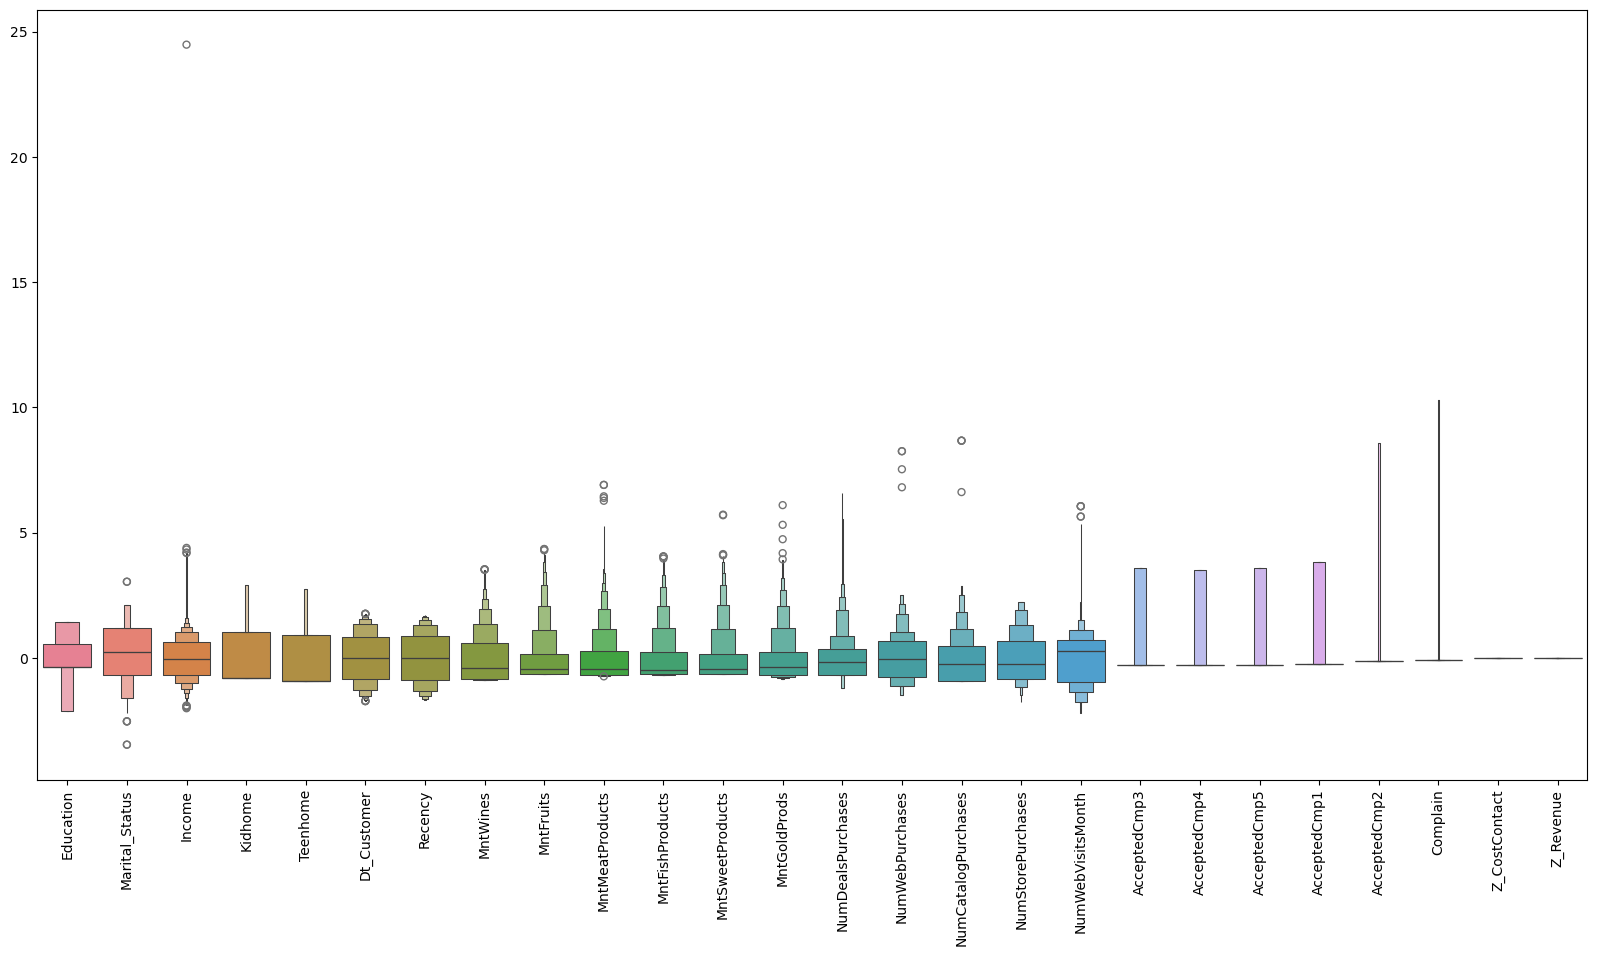

In [13]:
#Detecting outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [14]:
# Outlier Equation
def outlier_thresholds (dataframe, column, q1=0.25, q3=0.75) :
    quartile1 = dataframe[column].quantile(q1)
    quartile3 = dataframe[column].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

# Checking Outliers
def check_outlier(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    outliers = (dataframe[column] > up_limit) | (dataframe[column] < low_limit)
    if outliers.any():
        return True
    else:
        return False

# Replace with threshold
def replace_with_thresholds (dataframe, column) :
    low_limit , up_limit = outlier_thresholds(dataframe, column)
    dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
    dataframe.loc[(dataframe[column] > up_limit), column] = up_limit

# Replace with median
def replace_with_median(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    median_value = dataframe[column].mean()
    dataframe.loc[(dataframe[column] < low_limit), column] = median_value
    dataframe.loc[(dataframe[column] > up_limit), column] = median_value

In [15]:
print('Before removing the outliers :')
for column in (df.drop(columns = ["Response"]).columns):
    print(column, check_outlier(df, column))

Before removing the outliers :
Education True
Marital_Status False
Income True
Kidhome False
Teenhome False
Dt_Customer False
Recency False
MntWines True
MntFruits True
MntMeatProducts True
MntFishProducts True
MntSweetProducts True
MntGoldProds True
NumDealsPurchases True
NumWebPurchases True
NumCatalogPurchases True
NumStorePurchases False
NumWebVisitsMonth True
AcceptedCmp3 True
AcceptedCmp4 True
AcceptedCmp5 True
AcceptedCmp1 True
AcceptedCmp2 True
Complain True
Z_CostContact False
Z_Revenue False


In [16]:
cols_with_low_values = []
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}' has {len(unique_values)} unique values")
    if len(unique_values) <=20:
        cols_with_low_values.append(col)

Column 'Education' has 5 unique values
Column 'Marital_Status' has 8 unique values
Column 'Income' has 1998 unique values
Column 'Kidhome' has 3 unique values
Column 'Teenhome' has 3 unique values
Column 'Dt_Customer' has 663 unique values
Column 'Recency' has 100 unique values
Column 'MntWines' has 776 unique values
Column 'MntFruits' has 158 unique values
Column 'MntMeatProducts' has 558 unique values
Column 'MntFishProducts' has 182 unique values
Column 'MntSweetProducts' has 177 unique values
Column 'MntGoldProds' has 213 unique values
Column 'NumDealsPurchases' has 15 unique values
Column 'NumWebPurchases' has 15 unique values
Column 'NumCatalogPurchases' has 14 unique values
Column 'NumStorePurchases' has 14 unique values
Column 'NumWebVisitsMonth' has 16 unique values
Column 'AcceptedCmp3' has 2 unique values
Column 'AcceptedCmp4' has 2 unique values
Column 'AcceptedCmp5' has 2 unique values
Column 'AcceptedCmp1' has 2 unique values
Column 'AcceptedCmp2' has 2 unique values
Colu

In [17]:
cols_with_low_values

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [18]:
print('After removing the outliers :')
for column in (df.drop(columns = cols_with_low_values).columns):
    replace_with_thresholds(df, column)
    print(column, check_outlier(df, column))

After removing the outliers :
Income False
Dt_Customer False
Recency False
MntWines False
MntFruits False
MntMeatProducts False
MntFishProducts False
MntSweetProducts False
MntGoldProds False


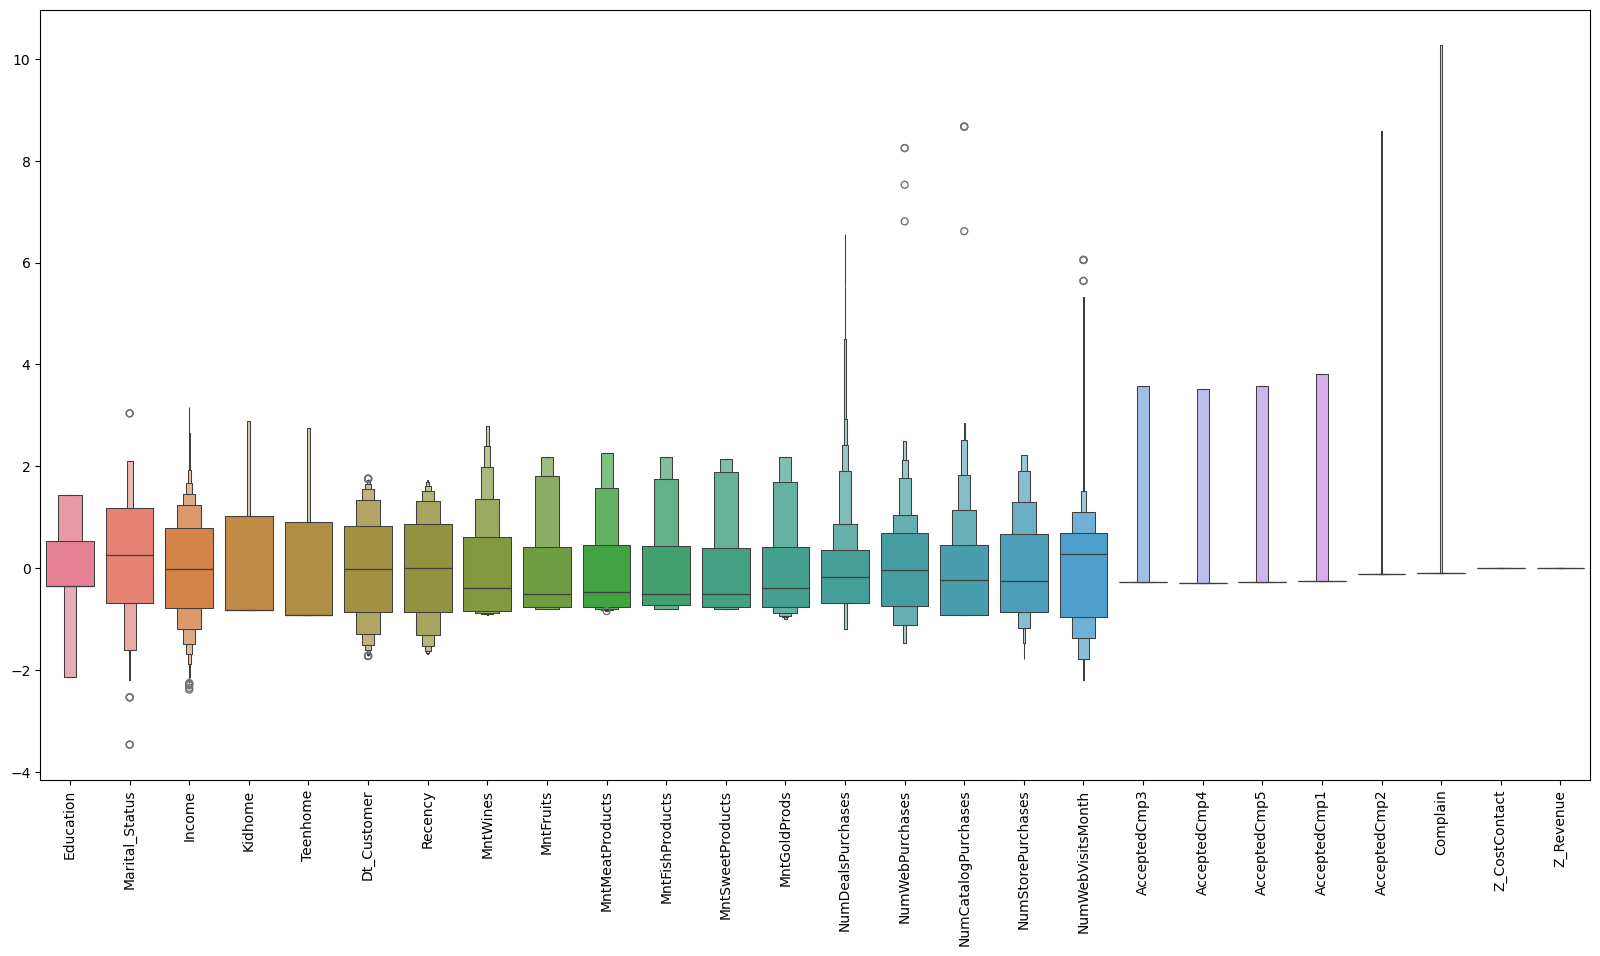

In [19]:
features = df.drop(["Response"], axis=1) # dropping target and extra columns

# Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

#Detecting outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [20]:
df.Complain.value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

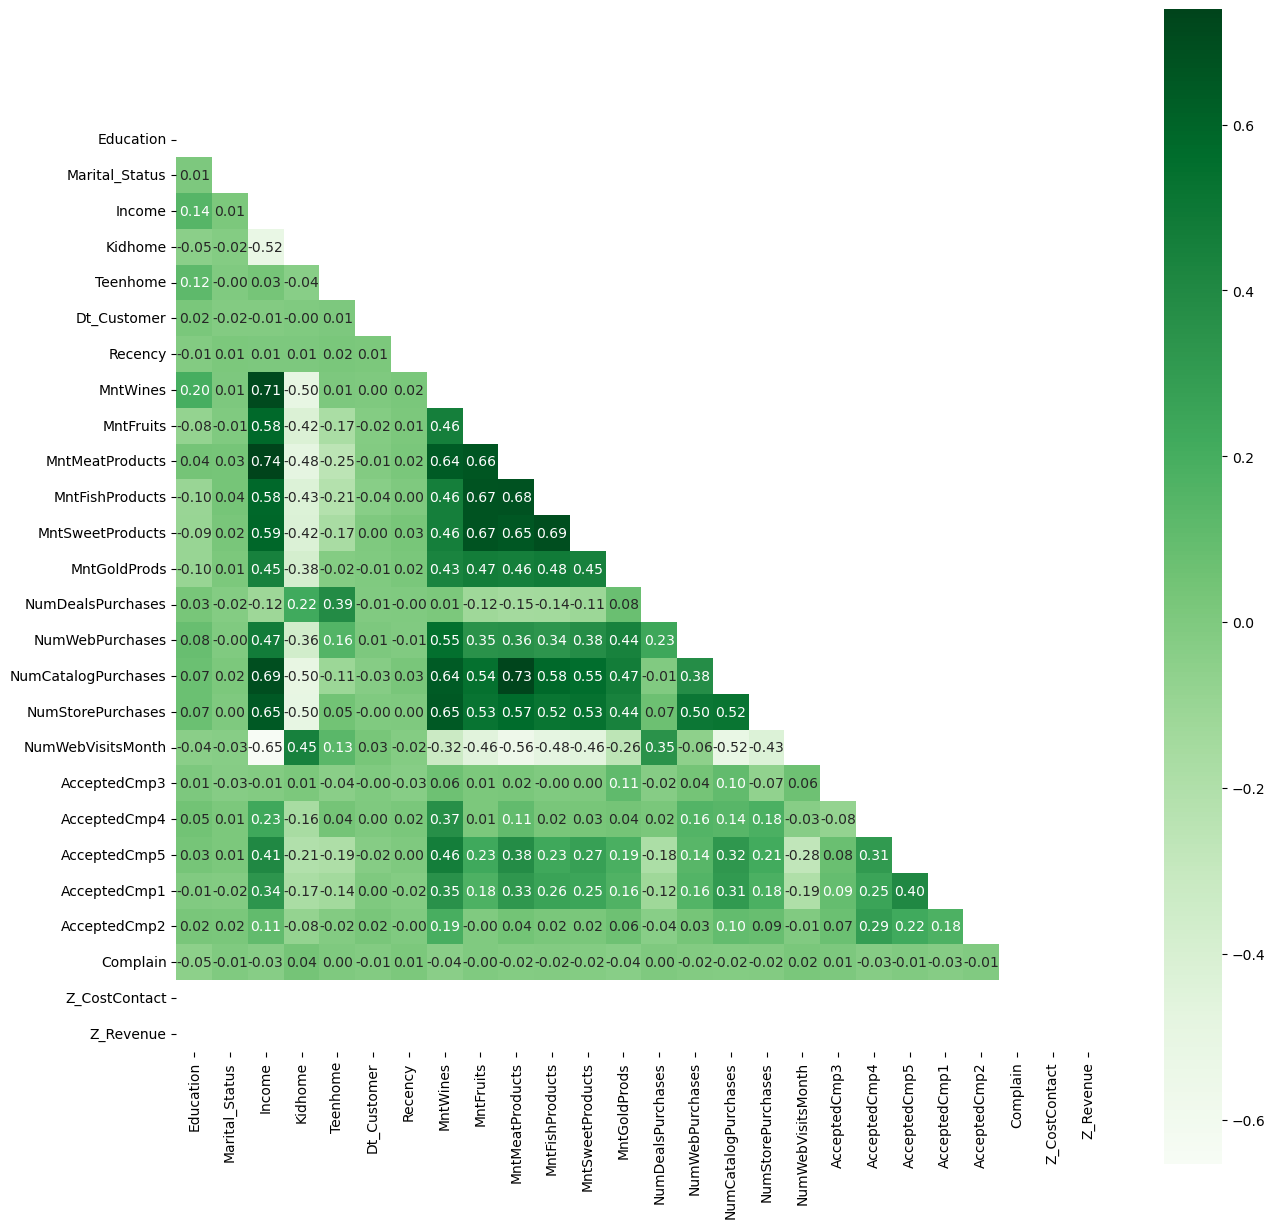

In [21]:
corr = df.drop(["Response"], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.2f', cmap='Greens')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [22]:
# add a constant
X = add_constant(df.drop(['Response'], axis=1))

# for each column we calculate the vif value
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                feature       VIF
0             Education  1.177444
1        Marital_Status  1.008721
2                Income  4.862022
3               Kidhome  1.870676
4              Teenhome  1.578974
5           Dt_Customer  1.006874
6               Recency  1.009572
7              MntWines  3.779455
8             MntFruits  2.471770
9       MntMeatProducts  3.982572
10      MntFishProducts  2.702144
11     MntSweetProducts  2.549663
12         MntGoldProds  1.674757
13    NumDealsPurchases  1.695551
14      NumWebPurchases  1.989686
15  NumCatalogPurchases  2.927805
16    NumStorePurchases  2.500064
17    NumWebVisitsMonth  2.662627
18         AcceptedCmp3  1.106023
19         AcceptedCmp4  1.385395
20         AcceptedCmp5  1.604556
21         AcceptedCmp1  1.341977
22         AcceptedCmp2  1.153834
23             Complain  1.007699
24        Z_CostContact  0.000000
25            Z_Revenue  0.000000


/home/tony/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [23]:
df_reduced = df.drop(["Response"], axis=1)

X_reduced = add_constant(df_reduced)
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print(vif_data_reduced)

                feature       VIF
0             Education  1.177444
1        Marital_Status  1.008721
2                Income  4.862022
3               Kidhome  1.870676
4              Teenhome  1.578974
5           Dt_Customer  1.006874
6               Recency  1.009572
7              MntWines  3.779455
8             MntFruits  2.471770
9       MntMeatProducts  3.982572
10      MntFishProducts  2.702144
11     MntSweetProducts  2.549663
12         MntGoldProds  1.674757
13    NumDealsPurchases  1.695551
14      NumWebPurchases  1.989686
15  NumCatalogPurchases  2.927805
16    NumStorePurchases  2.500064
17    NumWebVisitsMonth  2.662627
18         AcceptedCmp3  1.106023
19         AcceptedCmp4  1.385395
20         AcceptedCmp5  1.604556
21         AcceptedCmp1  1.341977
22         AcceptedCmp2  1.153834
23             Complain  1.007699
24        Z_CostContact  0.000000
25            Z_Revenue  0.000000


/home/tony/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [24]:
features = df.drop('Response',axis = 1, inplace = True)


In [25]:
col_names = list(df.columns)
s_scaler = StandardScaler()
df_scaled = s_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=col_names) 
df_scaled

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-0.350141,0.251004,0.298453,-0.825218,-0.929894,-1.303763,0.307039,1.005751,2.176816,2.210169,...,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
1,-0.350141,0.251004,-0.262592,1.032559,0.906934,-0.898762,-0.383664,-0.879539,-0.758828,-0.810358,...,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2,-0.350141,1.180340,0.939464,-0.825218,-0.929894,0.610786,-0.798086,0.374300,1.002558,-0.133536,...,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
3,-0.350141,1.180340,-1.199633,1.032559,-0.929894,-0.677853,-0.798086,-0.879539,-0.648741,-0.732048,...,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
4,1.428354,-0.678332,0.305826,1.032559,-0.929894,0.326760,1.550305,-0.390089,0.782385,-0.183879,...,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.350141,-0.678332,0.445207,-0.825218,0.906934,-0.293891,-0.107383,1.229327,0.782385,0.174110,...,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2236,1.428354,1.180340,0.577976,2.890335,0.906934,-0.635775,0.237969,0.313874,-0.795523,-0.676113,...,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0
2237,-0.350141,-1.607669,0.243414,-0.825218,-0.929894,1.015787,1.446700,1.830566,0.965863,0.369885,...,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0
2238,0.539106,1.180340,0.826817,-0.825218,0.906934,0.905332,-1.419719,0.380342,0.305343,0.353104,...,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0


In [26]:
def compare_algorithms(X, max_clusters):
  results = []
  cluster_range = range(2, max_clusters +1)

  #kmeans
  for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters) # the bigger it is, the better will be
    results.append(('KMeans',n_clusters,silhouette_avg))
  
  #agglomerativo
  for n_clusters in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    results.append(('Agglomerative',n_clusters,silhouette_avg))

  #dbscan
  eps_values = np.arange(0.1,0.9,0.1)
  # eps come from 01 to 0.9
  for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X)
    if len(set(clusters)) > 1:
      silhouette_avg = silhouette_score(X, clusters)
      results.append(('DBSCAN',eps,silhouette_avg))

  return results

In [28]:
results = compare_algorithms(df_scaled, 10)
df = pd.DataFrame(results, columns=['Agrupador','Clusters','Score'])
df.sort_values(by="Score", ascending=False)

,Agrupador,Clusters,Score
0,KMeans,2.0,0.257668
9,Agglomerative,2.0,0.255367
1,KMeans,3.0,0.185712
2,KMeans,4.0,0.181199
3,KMeans,5.0,0.172957
16,Agglomerative,9.0,0.155452
17,Agglomerative,10.0,0.150673
15,Agglomerative,8.0,0.150100
14,Agglomerative,7.0,0.149534
13,Agglomerative,6.0,0.138960


In [29]:
max_score_index = df['Score'].idxmax()
print(df.loc[max_score_index])

Agrupador      KMeans
Clusters          2.0
Score        0.257668
Name: 0, dtype: object


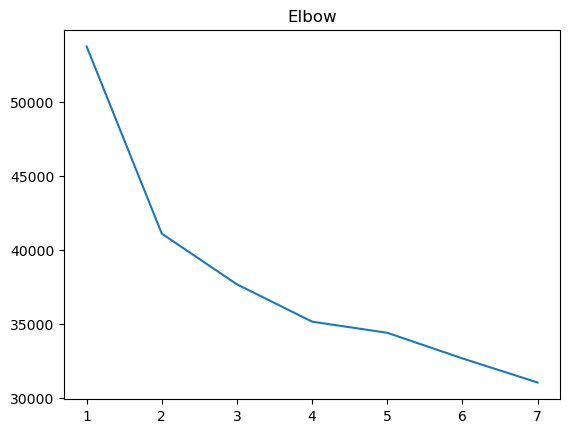

In [30]:
inertia = []
# 8 will be the max cluster i want 
for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,8), inertia)
plt.title("Elbow")
plt.show()

In [31]:
def plot_clusters(data, labels, title):
  colors = ['red','green','purple','black']
  plt.figure(figsize=(8,4))
  for i,c,l in zip(range(-1,3), colors, ['Noise','Setosa','Versicolor','Virginica']):
    if i == -1:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label = l, alpha=0.5, s=50, marker='x')
    else:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label = l, alpha=0.5, s=50)
  plt.legend()
  plt.title(title)
  plt.xlabel('Comprimento Sépala')
  plt.ylabel("Largura da Pétala")
  plt.show()

In [32]:
kmeans = KMeans(n_clusters=3,n_init='auto')
kmeans.fit(df_scaled)
print(kmeans.labels_)

agrupamento1 = pd.DataFrame(kmeans.labels_, columns = ['Grupo'])
agrupamento1

df2 = pd.concat([df_scaled, agrupamento1],axis=1)
df2

[2 1 2 ... 0 0 1]


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Grupo
0,-0.350141,0.251004,0.298453,-0.825218,-0.929894,-1.303763,0.307039,1.005751,2.176816,2.210169,...,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2
1,-0.350141,0.251004,-0.262592,1.032559,0.906934,-0.898762,-0.383664,-0.879539,-0.758828,-0.810358,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,1
2,-0.350141,1.180340,0.939464,-0.825218,-0.929894,0.610786,-0.798086,0.374300,1.002558,-0.133536,...,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2
3,-0.350141,1.180340,-1.199633,1.032559,-0.929894,-0.677853,-0.798086,-0.879539,-0.648741,-0.732048,...,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,1
4,1.428354,-0.678332,0.305826,1.032559,-0.929894,0.326760,1.550305,-0.390089,0.782385,-0.183879,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.350141,-0.678332,0.445207,-0.825218,0.906934,-0.293891,-0.107383,1.229327,0.782385,0.174110,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,0
2236,1.428354,1.180340,0.577976,2.890335,0.906934,-0.635775,0.237969,0.313874,-0.795523,-0.676113,...,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0,0
2237,-0.350141,-1.607669,0.243414,-0.825218,-0.929894,1.015787,1.446700,1.830566,0.965863,0.369885,...,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,0
2238,0.539106,1.180340,0.826817,-0.825218,0.906934,0.905332,-1.419719,0.380342,0.305343,0.353104,...,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,0
